### Exercícios práticos 04 - Syanne Tavares

#### Resolução de sistemas lineares

- Podem ter 3 situações

1. Solução única -> retas concorrentes -> se tocam em 1 único ponto
2. Infinitas soluções -> retas coicidentes - pode ser qualquer tipo de valor
3. Sem solução -> Reta paralelas 

- 2 formas de resolver 
1. Métodos Diretos 
2. Métodos iterativos


## Exercício 01 - 

Implemente todas as técnicas de solução de sistemas lineares vistas em aula e faça uma comparação entre elas para as seguintes situações

# Métodos Diretos

# 1. Eliminação de Gauss
Resumidamente -> transforma o sistema em um sistema equivalente do tipo triangular superior e resolve a partir disso

In [7]:
import numpy as np
import pandas as pd

  
# Resolve o sistema triangular superior.
def SistemaTriangularSuperior(Ax,b):
  """Função que resolve um sistema linear triangular superior do tipo  𝐴𝑥 = b que recebe como parâmetro """
  n = len(b) #tamanho do vetor b
  x= [b[i]/Ax[i][i] if i == 0 else None for i in range(0,len(b))]

  x[n-1] = b[n-1]/Ax[n-1][n-1]
  iter = 0
  for i in list(range(n-1,0,-1)):
    iter+=1
    s = 0
    for j in list(range(i+1,n+1)):
      s = s + Ax[i-1][j-1]*x[j-1]

    x[i-1] = (b[i-1]-s)/(Ax[i-1][i-1])

  return [x,iter]

def EliminacaoDeGauss(A,b):
  """Função que resolve um sistema linear do tipo Ax = b que recebe como parâmetro
     Return : retorna o vetor x resultante"""
  
  # ELIMINAÇÃO DE GAUSS
  n = len(b)

  # Calculo dos pivos.
  for k in range(1,n+1):
    # PIVOTEAMENTO PARCIAL
    for i in range(k+1, len(A)+1):
      if (abs(A[i-1][k-1]) > abs(A[k-1][k-1])):
        [A[k-1], A[i-1]] = [A[i-1], A[k-1]]
        [b[k-1], b[i-1]] = [b[i-1], b[k-1]]

    # Calculo dos multiplicadores.
    for i in list(range(k+1,n+1)):
      m = A[i-1][k-1]/A[k-1][k-1]
      A[i-1][k-1] = 0
      
      # Atualizar demais valores da linha
      for j in list(range(k+1,n+1)):
        A[i-1][j-1] = A[i-1][j-1]-m*A[k-1][j-1]
      b[i-1] = b[i-1] - m*b[k-1]

  # print("depois da eliminação\n Ax =  ",Ax2,"\nb = ",b2)
  x = SistemaTriangularSuperior(A,b)
  return(x)

In [8]:
Ax = [[3, 2, 4],
      [1, 1, 2],
      [4, 3,-2]]
b = [1, 2, 3]

print("X: ",EliminacaoDeGauss(Ax,b)[0])

X:  [-3.0, 5.0, 0.0]


# 2. Fatoração LU com pivoteamento parcial

#### O processo de fatoração consistem em decompor a matriz A em um produto de dois ou mais fatores
▪ De forma que seja mais fácil resolver o sistema em etapas

In [9]:
def formata_matriz(M):
  """Função que printa uma matriz formatando-a"""
  m = len(M) # número de linhas
  n = len(M[0]) # número de colunas
  s = ""
  for i in range(m):
      for j in range(n):
          s += "%9.3f " % M[i][j]
      s +=  "\n"
  return s

# Resolve o sistema triangular inferior.
def SistemaTriangularInferior(Ax,b):
  """Função que resolve um sistema triangular inferior"""
  n = len(b)
  
  y= [b[i]/Ax[i][i] if i == 0 else None for i in range(0,len(b))]
  iter = 0 
  for i in list(range(1,n+1,1)):
    iter+=1
    s = 0
    for j in list(range(1,i,1)):
      s = s + Ax[i-1][j-1]*y[j-1]

    y[i-1] = b[i-1] - s

  return y,iter

def LU_PivParc(A,b):
  """Função que resolve um sistema linear do tipo Ax = b usando o método de Fatoração LU com pivoteamento parcial 
     A = matriz de coeficientes
     b = vetor b resultante
     Retorna um vetor x calculado"""
  n = len(A)
  p=[0]*n
  

  ###### pivoteamento parcial 
  p = list(range(1,n+1)) #"matriz permutação"

  for k in range(1,n+1):
    pv = abs(A[k-1][k-1])
    Lpivo = k

    for i in range(k+1,n+1):
        if abs(A[i-1][k-1])> pv :
          pv = abs(A[i-1][k-1])
          Lpivo = i
  
    if pv == 0: 
      return None #matriz singular
      

    if Lpivo != k : # se for diferente então tem que realizar a permutação
      [p[k-1],p[Lpivo-1]] = [p[Lpivo-1],p[k-1]] # recurso guanabaristico
    
      for j in range(1,n+1):
          [A[k-1][j-1],A[Lpivo-1][j-1]] = [A[Lpivo-1][j-1],A[k-1][j-1]] 

  # resolução dos sistemas triangulares
  # Calculo dos pivos.
  for k in range(1,n+1):
    # Calculo dos multiplicadores.
    for i in range(k+1,n+1):
      m = A[i-1][k-1]/A[k-1][k-1]
      A[i-1][k-1] = m
      # Atualizar demais valores da linha
      for j in range(k+1,n+1,1):
        A[i-1][j-1] = A[i-1][j-1]-m*A[k-1][j-1]
  ### multiplicação da b pela "matriz permutação"
  c=[None for _ in range(0,len(b))]
  for i in range(1,n+1):
    Lpivo = p[i-1]
    c[i-1]=b[Lpivo-1]

  # resolução dos sistemas 
  y = SistemaTriangularInferior(A,c)
  x = SistemaTriangularSuperior(A,y[0])
  x[1] = y[1]+x[1]

  return x

#### Exemplo 

In [10]:
# Teste com dados.
Ai = [[3, -4, 1],
      [1, 2, 2],
      [4, 0, -3]]

bi = [9, 3, -2]

print("Ai = \n",formata_matriz(Ai))
#Obtendo os fatores L e U.
print("X =")
print(LU_PivParc(Ai,bi)[0])

Ai = 
     3.000    -4.000     1.000 
    1.000     2.000     2.000 
    4.000     0.000    -3.000 

X =
[1.0, -1.0, 2.0]


## Métodos iterativos



### 3. Gauss-Jacobi

In [11]:
def precisao_maquina():
    """Função que calcula a precisão da máquina com referência igual a 1"""
    A=1
    S=2

    while(S>1):
        A=A/2
        S=1+A
    prec=2*A

    return prec

In [12]:
import math
def TesteConvergencia(MatrizA):
    """Função que realiza teste de convergência pra uma matriz A
        Retorna True caso a seja convergente e False caso contrário"""
    Alfas=list()

    for i in range(len(MatrizA)):
        s=0
        for j in range(len(MatrizA)):
            if j!=i:
                s+=MatrizA[i][j]

        Alfas.append(s/MatrizA[i][i])
    # print(Alfas)
    # print(max(Alfas))

    if max(Alfas) < 1:
        return True
    else:
        return False
def criterioParada(x,xk,precisao=precisao_maquina()):
    """Função que compara x com x-1 verificando a precisão do método como um critério de parada"""
    soma = 0
    zip_object = zip(x, xk) # une as informações de duas variáveis
    for list1_i, list2_i in zip_object:
        soma = soma + math.fabs(list1_i-list2_i)

    if (soma < precisao):
        return True
    else:
        return False   
            
def GaussJacobi(MatrizA,b,max_iteracoes=300,precisao=precisao_maquina()):
    """Função que resolve um sistema linear do tipo Ax = b através do método iterativo de Gauss-Jacobi 
    Parâmetros:
        MatrizA = matriz de coeficientes do sistema linear
        b = vetor b
        max_iteracoes = npumero máximo de iterações
        precisao = precisão do erro
        
        retorno: tupla com
      vetor x resultante e com o número de iterações"""
    n= len(b) #tamanho de do vetor base

    X=b.copy() # copiando b pra x como chute inicial
    solucao = True
    # gerar chute inicial
    for i in list(range(1,n+1)): # percorre cada elemento de x de 1 até n
        # dividir pelo elemento da diagonal principal
        if math.fabs(MatrizA[i-1][i-1])> 0 :# verifica se é possível realizar divisão se a diagonal é diferente de zero
            X[i-1] = b[i-1]/MatrizA[i-1][i-1]
        else:
            solucao = False # não se pode calcular o chute inicial
            break
    if solucao and TesteConvergencia(MatrizA):
        # print("Iteração 0")
        # print("x = ",X)

        xk = X.copy()

        iter = 0
        
        # realiza o calculo de uma função iteração
        while (iter < max_iteracoes): # início das iterações
            iter = iter + 1
            for i in list(range(1,n+1)):
                s = 0

                #realiza o somatório
                for j in list(range(1,n+1)):
                    if ((i-1) != (j-1)):
                        s = s + MatrizA[i-1][j-1]*X[j-1] # somando os termos que não são da diagonal

                xk[i-1] = (1/MatrizA[i-1][i-1])*(b[i-1]-s) # equivale a 1/a(ii)*(bi - somatório de aij*xj)
                
            # print("Iteração: ",iter)
            # print("xk = ",xk)

            #verifica o critério de parada ->  O processo é repetido até ue x^k e x^k-1 eestejam suficientemente próximos
            if criterioParada(X,xk,precisao):
                X = xk.copy()
                break    
            X = xk.copy()
      
        return X,iter
    else:
        return None,None

#### Exemplo

In [13]:
#exemplo 

A = [[10, 2,  1],
     [ 1, 5,  1],
     [ 2, 3, 10]]

b = [7, -8, 6]

x,iter = GaussJacobi(A,b,10,0.01)
print("x = ",x)
print("N iterações = ",iter)

x =  [1.000236, -1.9989360000000003, 1.000284]
N iterações =  5


### 4. Gauss-Seidel

In [14]:
def GaussSeidel(MatrizA,b,max_iteracoes=300,precisao=precisao_maquina()):
    """Função que resolve um sistema linear do tipo Ax = b através do método iterativo de Gauss-Seidel
      Parâmetros:
      MatrizA = matriz de coeficientes do sistema linear
      b = vetor b
      max_iteracoes = npumero máximo de iterações
      precisao = precisão do erro
      
      retorno: tupla com
      vetor x resultante e com o número de iterações """
    n= len(b) #tamanho de do vetor base

    X=b.copy() # copiando b pra x como chute inicial
    solucao = True
    # gerar chute inicial
    for i in list(range(1,n+1)): # percorre cada elemento de x de 1 até n
        # dividir pelo elemento da diagonal principal
        if math.fabs(MatrizA[i-1][i-1])> 0 :# verifica se é possível realizar divisão se a diagonal é diferente de zero
            X[i-1] = b[i-1]/MatrizA[i-1][i-1]
        else:
            solucao = False # não se pode calcular o chute inicial
            break
    if solucao and TesteConvergencia(MatrizA):
      # print("Iteração 0")
      # print("x = ",X)

      xk = X.copy()

      iter    = 0
      
      # realiza o calculo de uma função iteração
      while (iter < max_iteracoes): # início das iterações
        iter = iter + 1
        for i in list(range(1,n+1)):
          s = 0

          #realiza o somatório
          for j in list(range(1,n+1)):
            if ((i-1) > (j-1)): # se o índice da linha é maior que o da coluna
              s = s + MatrizA[i-1][j-1]*xk[j-1] # usa o xk que tem os valores atualizados
            elif ((i-1) < (j-1)): # se o índice da linha é maior que o da coluna
              s = s + MatrizA[i-1][j-1]*X[j-1] 

          xk[i-1] = (1/MatrizA[i-1][i-1])*(b[i-1]-s) # equivale a 1/a(ii)*(bi - somatório de aij*xj)
      
        # print("Iteração: ",iter)
        # print("xk = ",xk)

        #verifica o critério de parada ->  O processo é repetido até ue x^k e x^k-1 eestejam suficientemente próximos
        if criterioParada(X,xk,precisao):
          X = xk.copy()
          break    
        X = xk.copy()
     
      return X,iter
    else:
       return None,None

#### Exemplo

In [15]:
#exemplo 

A = [[10, 2,  1],
     [ 1, 5,  1],
     [ 2, 3, 10]]

b = [7, -8, 6]

x,iter = GaussSeidel(A,b,10,0.01)
print("x = ",x)
print("N iterações = ",iter)


x =  [0.9999577430400001, -2.000046123328, 1.0000222883904002]
N iterações =  4


## Comparação entre os métodos
### Implemente todas as técnicas de solução de sistemas  lineares vistas em aula e faça uma comparação entre elas para as seguintes situaçõe
- n - [10,1000,2000,3000,...20000]
- Gere Sistemas lineares Aleatórios que atendam essas condições

In [16]:
def mudancaAleatoria(mat):

    n = mat.shape[0] 
    lin = np.random.randint(n)

    if(np.random.rand()>0.25):
        mat[lin,:] +=np.random.rand()*mat[np.random.randint(n),:] # 
    else:
        mat[lin,:]-=np.random.rand()*mat[np.random.randint(n),:]

def gerarSistema(n,Intervalo_round=[9,15]):
    """Função que gera um sistema linear do tipo Ax = b\n
      Parâmetros :\n
      n = Dimensão do sistema Linear\n
      Intervalo_round = intervalo que contém o número de mudanças Aleatórias que serão realizadas. É proporcional à densidade. 
      """
    mat = np.zeros((n,n+1)) # cria uma matriz zerada de dimensão n
    # print(mat)
    b= np.random.random(n) # gera um b aleatório
    mat[:,n]= b # adiciona esse b como última coluna da matriz
    # print(mat)
    mat[:,:-1] = np.identity(n) # cria uma matriz identidade 
    # print(mat)
    mat * np.random.randint(50,100)
    # print(mat)

    rounds = np.random.randint(Intervalo_round[0],Intervalo_round[1])
    while(rounds>0) :
        mudancaAleatoria(mat)
        rounds-=1
        # print("mudou")
        # print(mat)
    A = mat[:,:-1].tolist()
    x = b.tolist()
    newb = [element[0] for element in mat[: , -1:].tolist()]

    # print("Exemplos: ")
    # print("Matriz: \n",A)
    # print("x = ",x)
    # print("b = ",newb)

    return(A,x,newb)


In [17]:

def GetExemploSistemasLineares(Dimensao_n,it_max=300,precisao=precisao_maquina(),metodos=[1,2,3,4]):
    """FUNÇÃO QUE GERA UM EXEMPLO DE SISTEMA LINEAR DE DIMENSÃO RECBIDA POR PARÂMETRO E RESOLVE POR MÉTODOS DIRETOS E ITERATIVOS COMPARANDO OS RESULTADOS\n
        Parâmetros\n
        Dimensao_n = Dimensão da matriz de exemplo\n
        it_max : número máximo de iterações pros métodos iterativos\n
        precisao: precisão a ser utilizada nos métodos iterativos\n
        metodos : lista com os números dos métodos a serem utilizados [1(Eliminação de Gauss),2(LU com piv parc),3(Gauss-Jacobi),4(Gauss-Seidel)]
        """

    Ax,x,b = gerarSistema(Dimensao_n)
    results={"X":x}
    if 1 in metodos:
          results["Eliminação de Gauss"]=EliminacaoDeGauss(Ax,b)[0]
    if 2 in metodos:
          results["Fatoração LU e Piv Parc:"]=LU_PivParc(Ax,b)[0]
    if 3 in metodos:        
        resultJacobi,iteracoes = GaussJacobi(Ax,b,it_max,precisao)
        results[f"Gauss-Jacobi {iteracoes} iterações:"] = resultJacobi
    if 4 in metodos:  
        resultSeidel,iteracoes = GaussSeidel(Ax,b,it_max,precisao)
        results[f"Gauss-Seidel {iteracoes} iterações:"]=resultSeidel

    print("\nCOMPARAÇÃO RESULTADOS: \n")

#     print("X por eliminação de gauss: ",EliminacaoDeGauss(Ax,b))
#     print("X por Fatoração LU com pivoteamento parcial: ",LU_PivParc(Ax,b))
#     print(f"X por Gauss-Jacobi: {resultJacobi}, com {iteracoes} iterações") 
#     print(f"X por Gauss-Seidel: {resultSeidel}, com {iteracoes2} iterações")

    tabela = pd.DataFrame(results)
    display(tabela)

    return Ax,b,results

In [18]:
def ResolveSistemasLineares(Ax,x,b,it_max=300,precisao=precisao_maquina(),metodos=[1,2,3,4]):
    """RESOLVE POR MÉTODOS DIRETOS E ITERATIVOS COMPARANDO OS RESULTADOS\n
        Parâmetros\n
        Ax = Matriz de coeficientes\n
        b= vetor b
        x= resolução do sistema linear pra comparação com os métodos
        it_max : número máximo de iterações pros métodos iterativos\n
        precisao: precisão a ser utilizada nos métodos iterativos\n
        metodos : lista com os números dos métodos a serem utilizados [1(Eliminação de Gauss),2(LU com piv parc),3(Gauss-Jacobi),4(Gauss-Seidel)]
        """
    results={"X":x}
    if 1 in metodos:
          results["Eliminação de Gauss"]=EliminacaoDeGauss(Ax,b)[0]
    if 2 in metodos:
          results["Fatoração LU e Piv Parc:"]=LU_PivParc(Ax,b)[0]
    if 3 in metodos:        
        resultJacobi,iteracoes = GaussJacobi(Ax,b,it_max,precisao)
        results[f"Gauss-Jacobi {iteracoes} iterações:"] = resultJacobi
    if 4 in metodos:  
        resultSeidel,iteracoes = GaussSeidel(Ax,b,it_max,precisao)
        results[f"Gauss-Seidel {iteracoes} iterações:"]=resultSeidel

    print("\nCOMPARAÇÃO RESULTADOS: \n")

#     print("X por eliminação de gauss: ",EliminacaoDeGauss(Ax,b))
#     print("X por Fatoração LU com pivoteamento parcial: ",LU_PivParc(Ax,b))
#     print(f"X por Gauss-Jacobi: {resultJacobi}, com {iteracoes} iterações") 
#     print(f"X por Gauss-Seidel: {resultSeidel}, com {iteracoes2} iterações")

    tabela = pd.DataFrame(results)
    display(tabela)

### Matriz 10x10

In [19]:
A,x,b = gerarSistema(10,[9,13])
display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.621548,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.086246
2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.335353,0.0,0.0,0.000000
3,0.211571,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,-0.303885,0.000000,0.0,0.0,1.0,0.0,-0.729793,0.0,0.0,0.475827
5,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.082776
6,0.000000,0.000000,0.0,0.0,0.0,0.0,1.162355,0.0,0.0,0.114391
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 3 iterações:,Gauss-Seidel 3 iterações:
0,0.889220,0.889220,0.889220,0.889220,0.889220
1,0.812614,0.812614,0.812614,0.812614,0.812614
2,0.600143,0.600143,0.600143,0.600143,0.600143
3,0.254935,0.254935,0.254935,0.254935,0.254935
4,0.478132,0.478132,0.478132,0.478132,0.478132
5,0.566995,0.566995,0.566995,0.566995,0.566995
6,0.892896,0.892896,0.892896,0.892896,0.892896
7,0.950792,0.950792,0.950792,0.950792,0.950792
8,0.829973,0.829973,0.829973,0.829973,0.829973
9,0.912369,0.912369,0.912369,0.912369,0.912369


### Obs: Se forem matrizes pequenas é melhor usar o GetExemploSistemasLineares, 
 - Matrizes de dimensão grande é melhor gerar a matriz alterando o intervalo do round e depois resolver o sistema.
 - Tudo depende do interavalo do Round -> quantas vezes uma mudsança Aleatória será realizada

In [20]:
A,b,Results = GetExemploSistemasLineares(10)
print("Matriz:\n ")
display(pd.DataFrame(A))




COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.279488,0.279488,0.279488,None,None
1,0.435470,0.435470,0.435470,None,None
2,0.591934,0.591934,0.591934,None,None
3,0.224545,0.224545,0.224545,None,None
4,0.595177,0.595177,0.595177,None,None
5,0.675744,0.675744,0.675744,None,None
6,0.129075,0.129075,0.129075,None,None
7,0.460089,0.460089,0.460089,None,None
8,0.615587,0.615587,0.615587,None,None
9,0.029965,0.029965,0.029965,None,None


Matriz:
 


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,1.054785,0.0,0.000000,0.000000,0.0,0.0,0.211645,0.0
3,0.0,0.0,0.000000,1.0,0.730682,1.010952,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,1.000000,0.341039,0.0,0.0,0.176107,0.0
5,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0
7,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.0
8,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0
9,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0


# Matriz 20x20

In [21]:
A,x,b = gerarSistema(20,[100,150])
while not TesteConvergencia(A):
  A,x,b = gerarSistema(20,[50,60])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188370,0.000000,-0.424330,0.000000,0.698563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.135770,-0.097327,0.007882,-0.215339,-0.141545,0.690318,0.917921,-0.468796,0.000000,0.440828,0.145315,-0.059167,-0.018575,-0.158626,0.342696,0.139163,0.447059,-0.099794,-0.011950,-0.151783
2,-0.051968,0.000000,1.000000,0.000000,0.054178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.604052,0.000000,0.000000
3,0.750728,-0.034912,0.002827,0.922756,-0.782659,0.247624,0.329267,-0.459645,0.000000,0.158129,0.052126,-0.021224,-0.006663,-0.056901,0.122929,-0.596329,0.160365,0.611755,-0.004287,-0.054446
4,-0.959201,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.884772,0.000000,0.000000
5,-0.196004,-0.774216,0.000000,-0.390126,0.204341,1.250635,0.070990,-0.849308,0.000000,0.000000,0.263264,-0.107192,-0.033652,-0.287379,0.000000,0.252118,0.809928,-0.180795,0.000000,-0.274982
6,0.000000,-0.762435,0.306343,0.000000,0.000000,0.000000,1.118451,0.000000,0.000000,0.000000,0.439273,0.000000,0.000000,0.000000,0.316056,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.463090,-0.027076,-0.073020,0.405105,-0.482787,0.000000,0.174668,0.881919,0.000000,0.836791,0.647749,-0.231668,0.034944,0.298413,0.123321,-0.261798,-0.841026,0.000000,-0.022684,-0.676580
8,0.000000,-0.638327,0.000000,0.000000,0.000000,0.000000,0.837221,0.000000,1.502020,0.000000,0.000000,0.000000,0.000000,0.000000,0.264609,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.553412,0.000000,0.017879,0.000000,-0.576951,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.147374,0.000000,0.000000,0.000000,-0.027109,0.000000



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.233702,0.233702,0.233702,None,None
1,0.565222,0.565222,0.565222,None,None
2,0.513089,0.513089,0.513089,None,None
3,0.087965,0.087965,0.087965,None,None
4,0.639642,0.639642,0.639642,None,None
5,0.143148,0.143148,0.143148,None,None
6,0.163342,0.163342,0.163342,None,None
7,0.234377,0.234377,0.234377,None,None
8,0.219269,0.219269,0.219269,None,None
9,0.017809,0.017809,0.017809,None,None


In [22]:
A,x,b = gerarSistema(1000,[1000,2000])
# while not TesteConvergencia(A):
#   A,x,b = gerarSistema(1000,[100,200])
display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.487388,0.487388,0.487388,None,None
1,0.379543,0.379543,0.379543,None,None
2,0.393193,0.393193,0.393193,None,None
3,0.319406,0.319406,0.319406,None,None
4,0.325350,0.325350,0.325350,None,None
...,...,...,...,...,...
995,0.764159,0.764159,0.764159,None,None
996,0.136972,0.136972,0.136972,None,None
997,0.808517,0.808517,0.808517,None,None
998,0.275706,0.275706,0.275706,None,None


### Exemplos com sistemas Esparsos 
  - Grande número de zeros 
  - Números pequenos pro intervalo do round
  - proporcional à dimensão

In [23]:
A,x,b = gerarSistema(10,[1,10])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.162795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi 1 iterações:,Gauss-Seidel 1 iterações:
0,0.855900,0.855900,0.855900,0.855900,0.855900
1,0.410230,0.410230,0.410230,0.410230,0.410230
2,0.430278,0.430278,0.430278,0.430278,0.430278
3,0.782673,0.782673,0.782673,0.782673,0.782673
4,0.674460,0.674460,0.674460,0.674460,0.674460
5,0.660934,0.660934,0.660934,0.660934,0.660934
6,0.900597,0.900597,0.900597,0.900597,0.900597
7,0.350469,0.350469,0.350469,0.350469,0.350469
8,0.838894,0.838894,0.838894,0.838894,0.838894
9,0.324028,0.324028,0.324028,0.324028,0.324028


### Exemplo Sistema Denso


In [24]:
A,x,b = gerarSistema(5,[50,60])

while not TesteConvergencia(A):
  A,x,b = gerarSistema(5,[50,60])

display(pd.DataFrame(A))
ResolveSistemasLineares(A,x,b)

,0,1,2,3,4
0,-0.827710,5.687084,12.402461,0.142937,-3.055027
1,1.381850,5.289540,2.316987,-0.739410,-4.277785
2,1.216001,17.168197,19.439834,-1.716639,-13.216068
3,-0.610197,13.217978,16.363123,-1.225792,-10.974765
4,-2.412843,-4.583648,0.594179,0.955472,3.767655



COMPARAÇÃO RESULTADOS: 



,X,Eliminação de Gauss,Fatoração LU e Piv Parc:,Gauss-Jacobi None iterações:,Gauss-Seidel None iterações:
0,0.670514,0.670514,0.670514,None,None
1,0.718390,0.718390,0.718390,None,None
2,0.492794,0.492794,0.492794,None,None
3,0.695050,0.695050,0.695050,None,None
4,0.806330,0.806330,0.806330,None,None


# Mostre um gráfico para o tempo de execução e um com o  número de iterações
▪ As linhas devem ser os algoritmos

▪ Um gráfico para sistemas esparsos e outro para os densos

In [25]:
import time
def GetInfosGraficos2(Dimensoes=[2,3,4,5],):
  Resultados={"Dimensoes":Dimensoes,
              "it":[],
              "Times":[]}

  R_It=list()
  Times=list()
  R_It2=list()
  Times2=list()
  R_It3=list()
  Times3=list()
  R_It4=list()
  Times4=list()

  for D in Dimensoes:
    #gerar um sistema de Dimensao D
    Ax,x,b=gerarSistema(D)
    while GaussJacobi(Ax,b)[0] == None:
      Ax,x,b=gerarSistema(D)

    #pegar iterações e tempo por eliminação de gauss
    tempo_inicial=time.time() # em segundos
    R_It.append(EliminacaoDeGauss(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo por LU
    tempo_inicial=time.time() # em segundos
    R_It2.append(LU_PivParc(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times2.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo gauss-jacobi
    tempo_inicial=time.time() # em segundos
    R_It3.append(GaussJacobi(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times3.append(tempo_final-tempo_inicial)

    #pegar iterações e tempo gauss-seidel
    tempo_inicial=time.time() # em segundos
    R_It4.append(GaussSeidel(Ax,b)[1])
    tempo_final=time.time() # em segundos
    Times4.append(tempo_final-tempo_inicial)

  Resultados["it"].append(R_It)
  Resultados["it"].append(R_It2)
  Resultados["it"].append(R_It3)
  Resultados["it"].append(R_It4)

  Resultados["Times"].append(Times)
  Resultados["Times"].append(Times2)
  Resultados["Times"].append(Times3)
  Resultados["Times"].append(Times4)


  return Resultados

In [26]:
EliminacaoGauss=GetInfosGraficos2([10,100,200,300,400,500,600,700,600,700,1000])

In [27]:
print(EliminacaoGauss)

{'Dimensoes': [10, 100, 200, 300, 400, 500, 600, 700, 600, 700, 1000], 'it': [[9, 99, 199, 299, 399, 499, 599, 699, 599, 699, 999], [19, 199, 399, 599, 799, 999, 1199, 1399, 1199, 1399, 1999], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], 'Times': [[0.0, 0.12157130241394043, 1.2675480842590332, 4.194468975067139, 9.86530590057373, 19.558933973312378, 29.38357424736023, 43.5467746257782, 36.6823513507843, 74.48531675338745, 192.17078495025635], [0.0, 0.1849963665008545, 1.1030893325805664, 4.341444492340088, 9.863126277923584, 19.016622066497803, 26.202683448791504, 43.010295152664185, 44.87312054634094, 77.29327297210693, 168.14780163764954], [0.0010020732879638672, 0.01151275634765625, 0.04400014877319336, 0.07671523094177246, 0.12735795974731445, 0.2178969383239746, 0.3129234313964844, 0.5340590476989746, 0.5376169681549072, 0.47666025161743164, 0.800102710723877], [0.0, 0.016003131866455078, 0.04097104072570801, 0.09021329879760742, 0.20494723320007324, 0.22

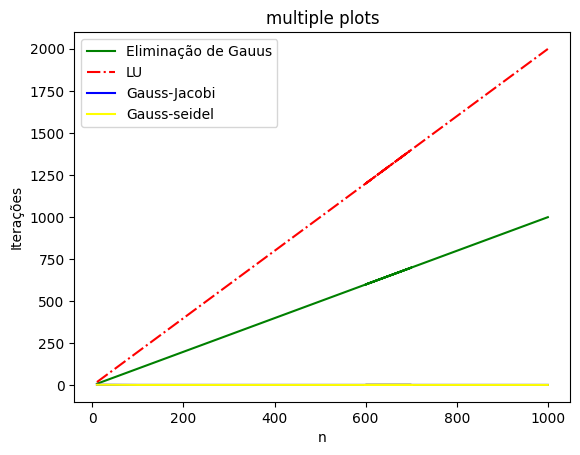

In [28]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array(EliminacaoGauss["Dimensoes"]) 
y =EliminacaoGauss["it"][0]
plt.plot(x, y,marker = '', label="Eliminação de Gauus",color = 'green') 
  
x1 = x
y1 = EliminacaoGauss["it"][1]
plt.plot(x1, y1, '-.',label="LU",marker = '', color = 'red') 

x2 = x
y2 = EliminacaoGauss["it"][2]
plt.plot(x2, y2, '-',label="Gauss-Jacobi",marker = '', color = 'blue') 

x3 = x
y3 = EliminacaoGauss["it"][3]
plt.plot(x3, y3, '-',label="Gauss-seidel",marker = '', color = 'yellow') 

plt.xlabel("n") 
plt.ylabel("Iterações") 
plt.title('multiple plots')
plt.legend()

plt.show()



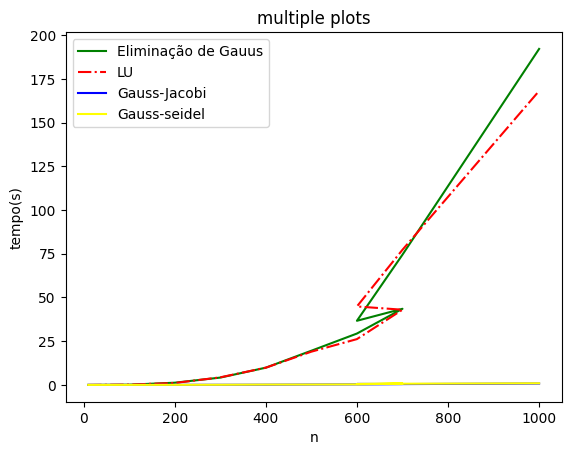

In [29]:
x = np.array(EliminacaoGauss["Dimensoes"]) 
y =EliminacaoGauss["Times"][0]
plt.plot(x, y,marker = '', label="Eliminação de Gauus",color = 'green') 
  
x1 = x
y1 = EliminacaoGauss["Times"][1]
plt.plot(x1, y1, '-.',label="LU",marker = '', color = 'red') 

x2 = x
y2 = EliminacaoGauss["Times"][2]
plt.plot(x2, y2, '-',label="Gauss-Jacobi",marker = '', color = 'blue') 

x3 = x
y3 = EliminacaoGauss["Times"][3]
plt.plot(x3, y3, '-',label="Gauss-seidel",marker = '', color = 'yellow') 

plt.xlabel("n") 
plt.ylabel("tempo(s)") 
plt.title('multiple plots')
plt.legend()

plt.show()

# Conclusão

- métodos iterativos resolvem mais rapidamente sistemas densos do que os métodos diretos
- métodos iterativos realizam bem menos iterações do que os diretos, os quais LU realiza mais iterações em relação a todos os demais métodos.
- Isso de justifica por conta da complexidade O(n^3) dos métodos diretos que é maior quando comprada com a complexidade dos iterativos que é de O(k*n^2)
- sistemas esparços são rapidamente resolvidos por todos os métodos sem tem maior número demuito gasto computacional (sem muitas iterações), com exeção da Fatoração LU com pivoteamento parcial que tem maior número  de iterações por conta das resoluções do sistemas triangulares superiores e inferiores
  